## import libraries


In [2]:
import pandas as pd
import numpy as np

In [3]:
#import dataset
data = pd.read_csv('Groceries_dataset.csv')

data.columns = [i.lower() for i in data.columns]

## general info 

In [4]:
data.head(3)

,member_number,date,itemdescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit


In [5]:
data.shape

(38765, 3)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   member_number    38765 non-null  int64 
 1   date             38765 non-null  object
 2   itemdescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
import seaborn as sns 
import matplotlib.pyplot as plt

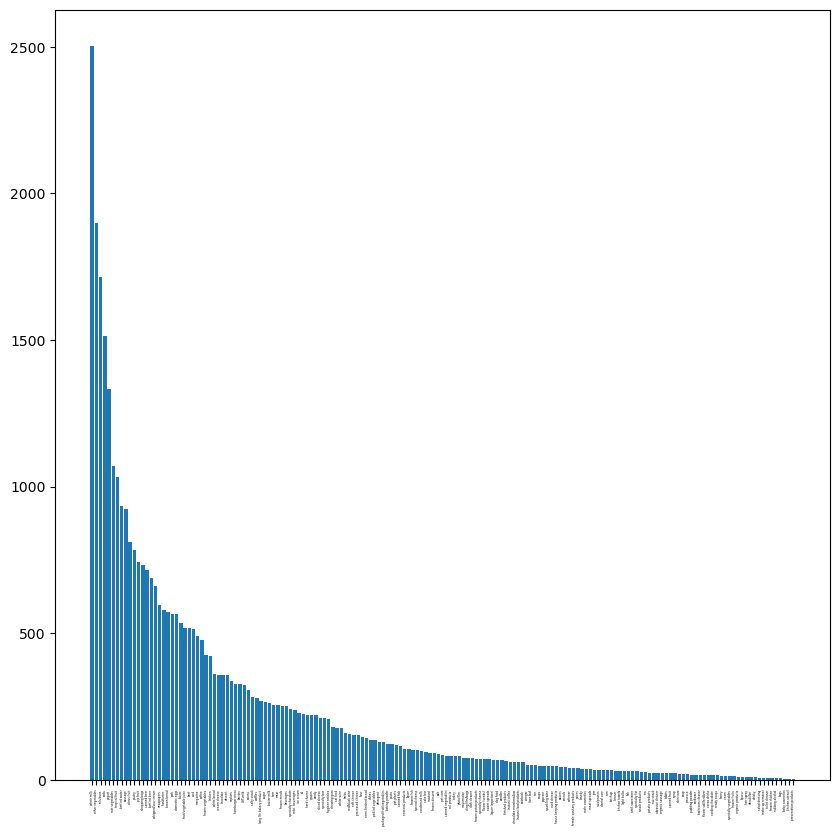

In [8]:
y = data['itemdescription'].value_counts()
y = dict(y)



plt.figure(figsize=(10,10))
plt.bar(y.keys(),y.values())
plt.xticks(rotation=90,fontsize=2)
plt.show()

### too many items for us to see so we will print the whole dict to see them 

In [9]:
y.keys()

dict_keys(['whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'root vegetables', 'tropical fruit', 'bottled water', 'sausage', 'citrus fruit', 'pastry', 'pip fruit', 'shopping bags', 'canned beer', 'bottled beer', 'whipped/sour cream', 'newspapers', 'frankfurter', 'brown bread', 'pork', 'domestic eggs', 'butter', 'fruit/vegetable juice', 'beef', 'curd', 'margarine', 'coffee', 'frozen vegetables', 'chicken', 'white bread', 'cream cheese ', 'chocolate', 'dessert', 'napkins', 'hamburger meat', 'berries', 'UHT-milk', 'onions', 'salty snack', 'waffles', 'long life bakery product', 'sugar', 'butter milk', 'ham', 'meat', 'frozen meals', 'beverages', 'specialty chocolate', 'misc. beverages', 'ice cream', 'oil', 'hard cheese', 'grapes', 'candy', 'sliced cheese', 'specialty bar', 'hygiene articles', 'chewing gum', 'cat food', 'white wine', 'herbs', 'red/blush wine', 'soft cheese', 'processed cheese', 'flour', 'semi-finished bread', 'dishes', 'pickled vegetables', 'detergent', 'pac

# now lets take transactions for each customer for each day

In [10]:
transactions = [i[1]['itemdescription'].tolist() for i in list(data.groupby(['member_number','date']))]

In [11]:
transactions


[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [12]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
trans = te.fit_transform(transactions)

### lets see them in a dataframe 

In [13]:
data = pd.DataFrame(trans,columns=te.columns_)
data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# now that we got the transactions lets use apriori algorithm

In [14]:
from mlxtend.frequent_patterns  import apriori

In [15]:
rules = apriori(data,min_support=0.001,use_colnames=True)

In [16]:
rules = rules.sort_values('support',ascending=False)

In [17]:
rules

,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)
...,...,...
344,0.001002,"(margarine, chicken)"
201,0.001002,"(chicken, bottled beer)"
202,0.001002,"(chocolate, bottled beer)"
516,0.001002,"(hamburger meat, pastry)"


# lets make a beautuful dataframe showing the results 

In [18]:
sets = []
for i in range(len(rules['itemsets'].values)):
    sets.append(list(rules['itemsets'].values[i]))

In [19]:
first = []
second = []
for i in sets:
    if len(i)  == 1:
        first.append(i[0])
        second.append(i[0])
    else:
        first.append(i[0])
        second.append(i[1])

        
        

In [20]:
results = pd.DataFrame({'item1' : first,'item2':second,'support': rules['support'].values})

### 100 most common item combinations : 

In [26]:
oneh = results.iloc[:100,:].values

In [27]:
for i in oneh:
    print(i)

['whole milk' 'whole milk' 0.15792287642852368]
['other vegetables' 'other vegetables' 0.12210118291786407]
['rolls/buns' 'rolls/buns' 0.11000467820624206]
['soda' 'soda' 0.09710619528169484]
['yogurt' 'yogurt' 0.08587850030074183]
['root vegetables' 'root vegetables' 0.06957160997126245]
['tropical fruit' 'tropical fruit' 0.0677671589921807]
['bottled water' 'bottled water' 0.06068301811134131]
['sausage' 'sausage' 0.06034886052262247]
['citrus fruit' 'citrus fruit' 0.05313105660629553]
['pastry' 'pastry' 0.0517275947336764]
['pip fruit' 'pip fruit' 0.049054334023925686]
['shopping bags' 'shopping bags' 0.04758404063356279]
['canned beer' 'canned beer' 0.04691572545612511]
['bottled beer' 'bottled beer' 0.04531176903027468]
['whipped/sour cream' 'whipped/sour cream' 0.043707812604424245]
['newspapers' 'newspapers' 0.038895943326872955]
['frankfurter' 'frankfurter' 0.037759807525228894]
['brown bread' 'brown bread' 0.03762614448974136]
['pork' 'pork' 0.037091492347791216]
['domestic eg